In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Read and clean data

In [39]:
data_folder = 'C:/Users/Graham West/Python Notebooks/Meharry Teaching/Datasets/'

df = pd.read_csv(data_folder + 'Real Estate/Real Estate Data.csv', index_col=0, header=0)
df = df.reset_index(drop=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      1404 non-null   object 
 1   Zoning Class              1404 non-null   object 
 2   Lot Frontage              1151 non-null   float64
 3   Lot Area                  1404 non-null   int64  
 4   Alley                     84 non-null     object 
 5   Lot Shape                 1404 non-null   object 
 6   Land Contour              1404 non-null   object 
 7   Lot Config                1404 non-null   object 
 8   Land Slope                1404 non-null   object 
 9   Nbhd                      1404 non-null   object 
 10  Location Condition        1404 non-null   object 
 11  Bldg Type                 1404 non-null   object 
 12  House Style               1404 non-null   object 
 13  OvQual                    1404 non-null   int64  
 14  Overall 

,Type,Zoning Class,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Nbhd,Location Condition,Bldg Type,House Style,OvQual,Overall Cond,Built,Year Remod Add,Roof Style,Roof Material,Exterior Primary,Masonry/Veneer,Masonry/Veneer Area,Exterior Qual,Exterior Cond,Foundation,Basement Height,Basement Cond,Basement Exposure,Basement Finish,Basement Finished Area,Basement Unfinished Area,Basement Area,Heating Qual,CentralAir,Electrical,1st Floor Area,2nd Floor Area,Living Area Above Grade,Basement Full Baths,Basement Half baths,Full Baths Above Grade,Half Baths Above Grade,Bedrooms Above Grade,Kitchens Above Grade,Kitchen Qual,Total Rooms Above Grade,Functionality,Fireplaces,Fireplce Qual,Garage Type,Garage Yr Built,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Pool Qual,Fence,Sale Type,Sale Condition,Sale Price
0,2-STORY 1946 & NEWER,Resid Low Density,65.0,8450,NaN,Regular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2003,2003,Gable,Composite Shingle,Vinyl Siding,Brick Face,196.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,No Exposure,Good Living Quarters,706,150,856,Excellent,Y,Standard Circuit Breakers & Romex,856,854,1710,1,0,2,1,3,1,Good,8,Typical Functionality,0,No Fireplace,Attached to home,2003.0,Rough Finished,2,548,Average,Average,Paved,0,61,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,208500
1,1-STORY 1946 & NEWER,Resid Low Density,80.0,9600,NaN,Regular,Level,Frontage on 2 sides,Gentle,Veenker,Adjacent Feeder St,1-family Detached,1 story,6,8,1976,1976,Gable,Composite Shingle,Metal Siding,NaN,0.0,Average,Average,Cinder Block,"Good (90-99"")",Average,Good Exposure,Avg Living Quarters,978,284,1262,Excellent,Y,Standard Circuit Breakers & Romex,1262,0,1262,0,1,2,0,3,1,Average,6,Typical Functionality,1,Average,Attached to home,1976.0,Rough Finished,2,460,Average,Average,Paved,298,0,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,181500
2,2-STORY 1946 & NEWER,Resid Low Density,68.0,11250,NaN,Slightly irregular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2001,2002,Gable,Composite Shingle,Vinyl Siding,Brick Face,162.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Min Exposure,Good Living Quarters,486,434,920,Excellent,Y,Standard Circuit Breakers & Romex,920,866,1786,1,0,2,1,3,1,Good,6,Typical Functionality,1,Average,Attached to home,2001.0,Rough Finished,2,608,Average,Average,Paved,0,42,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,223500
3,2-STORY 1945 & OLDER,Resid Low Density,60.0,9550,NaN,Slightly irregular,Level,Corner lot,Gentle,Crawford,Normal,1-family Detached,2 story,7,5,1915,1970,Gable,Composite Shingle,Wood Siding,NaN,0.0,Average,Average,Brick & Tile,"Typical (80-89"")",Good,No Exposure,Avg Living Quarters,216,540,756,Good,Y,Standard Circuit Breakers & Romex,961,756,1717,1,0,1,0,3,1,Good,7,Typical Functionality,1,Good,Detached from home,1998.0,Unfinished,3,642,Average,Average,Paved,0,35,272,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,"Abnormal Sale - trade, foreclosure, short sale",140000
4,2-STORY 1946 & NEWER,Resid Low Density,84.0,14260,NaN,Slightly irregular,Level,Frontage on 2 sides,Gentle,Northridge,Normal,1-family Detached,2 story,8,5,2000,2000,Gable,Composite Shingle,Vinyl Siding,Brick Face,350.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Avg Exposure,Good Living Quarters,655,490,1145,Excellent,Y,Standard Circuit Breakers & Romex,1145,1053,2198,1,0,2,1,4,1,Good,9,Typical Functionality,1,Average,Attached to home,2000.0,Rough Finished,3,836,Average,Average,Paved,192,84,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,250000


### Rename columns

In [40]:
df = df.rename(columns = {'OvQual':'Overall Qual',
                          'Built':'Year',
                          'Garage Yr Built':'Year Garage'})

### Drop Alley column

In [41]:
df = df.drop(columns=['Alley'])

### Fill nans

In [42]:
df.isna().sum(axis=0).sort_values(ascending=False)

Masonry/Veneer              824
Lot Frontage                253
Year Garage                  63
Masonry/Veneer Area           8
Total Rooms Above Grade       0
Garage Type                   0
Fireplce Qual                 0
Fireplaces                    0
Functionality                 0
Type                          0
Garage Finish                 0
Kitchens Above Grade          0
Bedrooms Above Grade          0
Half Baths Above Grade        0
Full Baths Above Grade        0
Basement Half baths           0
Basement Full Baths           0
Kitchen Qual                  0
Garage Cars                   0
2nd Floor Area                0
Garage Area                   0
Garage Qual                   0
Garage Cond                   0
Paved Drive                   0
Wood Deck Area                0
Open Porch Area               0
Enclosed Porch Area           0
3 Season Porch Area           0
Screen Porch Area             0
Pool Area                     0
Pool Qual                     0
Fence   

In [43]:
gb1 = df.groupby(["Nbhd"])['Lot Frontage'].median().sort_values()

def fill_1(r):
    n = r.Nbhd
    
    x = r['Lot Frontage']
    
    if pd.isna(x):
        return gb1[n]
    else:
        return x
    # end
# end

df['Lot Frontage'] = df.apply(fill_1, axis=1)

In [44]:
gb2 = df.groupby(["Nbhd"])['Year Garage'].median().sort_values()

def fill_2(r):
    n = r.Nbhd
    
    x = r['Year Garage']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Year Garage'] = df.apply(fill_2, axis=1)

In [45]:
gb3 = df.groupby(["Nbhd"])['Masonry/Veneer Area'].median().sort_values()

def fill_3(r):
    n = r.Nbhd
    
    x = r['Masonry/Veneer Area']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Masonry/Veneer Area'] = df.apply(fill_3, axis=1)

In [46]:
df.isna().sum(axis=0).sort_values(ascending=False)

Masonry/Veneer              824
Type                          0
Kitchen Qual                  0
Garage Type                   0
Fireplce Qual                 0
Fireplaces                    0
Functionality                 0
Total Rooms Above Grade       0
Kitchens Above Grade          0
1st Floor Area                0
Bedrooms Above Grade          0
Half Baths Above Grade        0
Full Baths Above Grade        0
Basement Half baths           0
Basement Full Baths           0
Living Area Above Grade       0
Year Garage                   0
Garage Finish                 0
Garage Cars                   0
Garage Area                   0
Garage Qual                   0
Garage Cond                   0
Paved Drive                   0
Wood Deck Area                0
Open Porch Area               0
Enclosed Porch Area           0
3 Season Porch Area           0
Screen Porch Area             0
Pool Area                     0
Pool Qual                     0
Fence                         0
Sale Typ

### Drop Masonry/Veneer column

In [47]:
df = df.drop(columns=['Masonry/Veneer'])

# Feature engineering

### Floors

In [48]:
def get_floors(x):
    if x > 0:
        return 2
    else:
        return 1
    # end
# end

df['Floors'] = df['2nd Floor Area'].apply(get_floors)

### Areas

In [49]:
df['Indoor Area'] = df[
    [
        '1st Floor Area', '2nd Floor Area', 'Basement Area'
    ]
].sum(axis=1)

df['Outdoor Area'] = df[
    [
        '3 Season Porch Area', 'Enclosed Porch Area', 'Garage Area',
        'Open Porch Area', 'Pool Area', 'Screen Porch Area', 'Wood Deck Area'
    ]
].sum(axis=1)

df['Basement Finished Area Fraction'] = df['Basement Finished Area'] / df[['Basement Finished Area', 'Basement Unfinished Area']].sum(axis=1)
df['Basement Finished Area Fraction'] = df['Basement Finished Area Fraction'].fillna(0)

In [50]:
df = df.drop(
    columns=[
       '1st Floor Area', '2nd Floor Area', '3 Season Porch Area',
       'Basement Area', 'Basement Finished Area', 'Basement Unfinished Area',
       'Enclosed Porch Area', 'Garage Area', 'Living Area Above Grade',
       'Open Porch Area', 'Pool Area', 'Screen Porch Area', 'Wood Deck Area'
    ]
)

### Label encode qualities

In [51]:
from sklearn.preprocessing import OrdinalEncoder

# Define known categories
quality_order = ["Poor", "Fair", "Average", "Good", "Excellent"]

# Identify categorical columns that contain 'Average'
cols = df.columns[df.isin(['Average']).any(axis=0)]

# Replace unknown values with "Poor"
df[cols] = df[cols].applymap(lambda x: x if x in quality_order else "Poor")

# Initialize and fit OrdinalEncoder on a single-column DataFrame
encoder = OrdinalEncoder(
    categories=[quality_order]
)

encoder.fit(
    np.array(quality_order)[:,np.newaxis]
)

# Transform each column separately in a loop
for c in cols:
    df[c] = encoder.transform(df[[c]]).astype(int)[:,0]
# end

In [52]:
df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x.split(" ")[0]
)

df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x if x != "Typical" else "Average"
)

df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x if x in quality_order else "Poor"
)

df['Basement Height'] = encoder.transform(df[['Basement Height']]).astype(int)[:,0]

In [53]:
df['Pool Qual'] = df['Pool Qual'].apply(
    lambda x: x if x in quality_order else "Poor"
)

df['Pool Qual'] = encoder.transform(df[['Pool Qual']]).astype(int)[:,0]

### Central Air

In [54]:
df['CentralAir'] = df['CentralAir'].replace(
    {
        'Y':1,
        'N':0
    }
)

df = df.rename(
    columns={
        'CentralAir':'Central Air'
    }
)

# Filter price outliers

In [55]:
a = df['Sale Price'].quantile(0.01)
b = df['Sale Price'].quantile(0.99)

df = df[ (a<df['Sale Price']) & (df['Sale Price']<b) ].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Type                             1374 non-null   object 
 1   Zoning Class                     1374 non-null   object 
 2   Lot Frontage                     1374 non-null   float64
 3   Lot Area                         1374 non-null   int64  
 4   Lot Shape                        1374 non-null   object 
 5   Land Contour                     1374 non-null   object 
 6   Lot Config                       1374 non-null   object 
 7   Land Slope                       1374 non-null   object 
 8   Nbhd                             1374 non-null   object 
 9   Location Condition               1374 non-null   object 
 10  Bldg Type                        1374 non-null   object 
 11  House Style                      1374 non-null   object 
 12  Overall Qual        

# Preprocess data

In [56]:
X_raw = df.drop(columns=['Sale Price'])
y = df['Sale Price']

### Split numeric and categorical columns for separate processing

In [57]:
X_num = X_raw.select_dtypes(exclude=object)
X_cat = X_raw.select_dtypes(include=object)

### Process numerical data in several ways

In [58]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_num_ss = pd.DataFrame()
for c in X_num.columns:
    X_num_ss[c] = std_scaler.fit_transform(X_num[[c]])[:,0]
# end

### Get categorical dummies

In [59]:
X_dum = pd.DataFrame()
for c in X_cat.columns:
    dummy = pd.get_dummies(X_cat[c], prefix=c, dtype=int)
    dummy_sum = dummy.sum(axis=0)
    col_to_drop = dummy_sum.idxmax()
    dummy = dummy.drop(columns=[col_to_drop])
    X_dum = pd.concat([X_dum, dummy], axis=1)
# end
X_dum.head()

,Type_1 STORY PUD,Type_1-1/2 STORY ALL AGES,Type_1-STORY 1945 & OLDER,Type_1-STORY PUD,Type_2 FAMILY CONVERSION,Type_2-1/2 STORY ALL AGES,Type_2-STORY 1945 & OLDER,Type_2-STORY 1946 & NEWER,Type_2-STORY PUD,Type_DUPLEX,Type_SPLIT FOYER,Type_SPLIT OR MULTI-LEVEL,Zoning Class_Commercial,Zoning Class_Floating Village Resid,Zoning Class_Resid High Density,Zoning Class_Resid Med Density,Lot Shape_Irregular,Lot Shape_Slightly irregular,Land Contour_Banked,Land Contour_Depression,Land Contour_Hillside,Lot Config_Corner lot,Lot Config_Cul-de-sac,Lot Config_Frontage on 2 sides,Lot Config_Frontage on 3 sides,Land Slope_Moderate,Land Slope_Severe,Nbhd_Bloomington Heights,Nbhd_Bloomington Hts,Nbhd_Bluestem,Nbhd_Briardale,Nbhd_Brookside,Nbhd_Clear Creek,Nbhd_College Creek,Nbhd_Crawford,Nbhd_Edwards,Nbhd_Gilbert,Nbhd_Iowa DOT and Rail Road,Nbhd_Meadow Village,Nbhd_Mitchell,Nbhd_Northpark Villa,Nbhd_Northridge,Nbhd_Northridge Heights,Nbhd_Northwest Ames,Nbhd_Old Town,Nbhd_Sawyer,Nbhd_Sawyer West,Nbhd_Somerset,Nbhd_South & West of Iowa State,Nbhd_Stone Brook,...,Exterior Primary_Stucco,Exterior Primary_Wood Shingles,Exterior Primary_Wood Siding,Foundation_Brick & Tile,Foundation_Cinder Block,Foundation_Slab,Foundation_Stone,Foundation_Wood,Basement Exposure_Avg Exposure,Basement Exposure_Good Exposure,Basement Exposure_Min Exposure,Basement Exposure_No Basement,Basement Finish_Avg Living Quarters,Basement Finish_Avg Rec Room,Basement Finish_Below Avg Living Quarters,Basement Finish_Good Living Quarters,Basement Finish_Low Quality,Basement Finish_No Basement,Electrical_60 AMP Fuse Box and mostly Romex wiring (Fair),Electrical_Fuse Box over 60 AMP and all Romex wiring (Average),Functionality_Major Deductions 1,Functionality_Minor Deductions 1,Functionality_Minor Deductions 2,Functionality_Moderate Deductions,Garage Type_Basement Garage,Garage Type_Built-In (Garage with Room),Garage Type_Car Port,Garage Type_Detached from home,Garage Type_More than one type of garage,Garage Type_No Garage,Garage Finish_Finished,Garage Finish_No Garage,Garage Finish_Rough Finished,Paved Drive_Dirt/Gravel,Paved Drive_Partial Pavement,Fence_Good Privacy,Fence_Good Wood,Fence_Minimum Privacy,Fence_Minimum Wood/Wire,Sale Type_Contract 15% Down payment regular terms,Sale Type_Contract Low Down,Sale Type_Contract Low Down payment and low interest,Sale Type_Contract Low Interest,Sale Type_Court Officer Deed/Estate,Sale Type_Home just constructed and sold,Sale Type_Warranty Deed - Cash,"Sale Condition_Abnormal Sale - trade, foreclosure, short sale","Sale Condition_Allocation - two linked properties with separate deeds, typically condo with a garage unit",Sale Condition_Home was not completed when last assessed (associated with New Homes),Sale Condition_Sale between family members
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Modeling

In [60]:
#X = pd.concat([X_num, X_dum], axis=1)
X = pd.concat([X_num_ss, X_dum], axis=1)

## Use parsimony to eliminate bad features first

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances = importances[:100]

features_rf = importances.index

X_pars = X[ features_rf ]
importances

Indoor Area                                                                             0.512394
Overall Qual                                                                            0.265587
Year                                                                                    0.036638
Lot Area                                                                                0.016951
Outdoor Area                                                                            0.016819
Basement Finished Area Fraction                                                         0.014416
Year Remod Add                                                                          0.011371
Basement Height                                                                         0.010215
Lot Frontage                                                                            0.008870
Kitchen Qual                                                                            0.008826
Garage Cars                   

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Copy dataset to avoid modifying the original
X_vif = X_pars.copy()

# Iteratively remove features with high VIF
while True:
    # Add constant for intercept
    X_vif_with_const = sm.add_constant(X_vif)
    
    # Compute VIF for all features
    vif_series = pd.Series(
        [variance_inflation_factor(X_vif_with_const.values, i) for i in range(X_vif_with_const.shape[1])],
        index=X_vif_with_const.columns
    )
    
    # Exclude constant term and get the feature with the highest VIF
    vif_series = vif_series.drop('const', errors='ignore')
    highest_vif_feature = vif_series.idxmax()
    #display(vif_series)
    
    # Break the loop if all features have VIF ≤ 10
    if vif_series.loc[highest_vif_feature] <= 10:  # Checking the first feature after 'const'
        break

    # Drop the feature with the highest VIF
    X_vif = X_vif.drop(columns=[highest_vif_feature])

    print(f"Dropped: {highest_vif_feature} (VIF={vif_series.loc[highest_vif_feature]:.2f})")
# end

vif_series[:25]

Dropped: Sale Type_Home just constructed and sold (VIF=39.64)
Dropped: House Style_2 story (VIF=14.51)
Dropped: Type_1-1/2 STORY ALL AGES (VIF=11.22)
Dropped: Year (VIF=11.09)


Indoor Area                        4.950287
Overall Qual                       4.245326
Lot Area                           1.818257
Outdoor Area                       3.152417
Basement Finished Area Fraction    3.301054
Year Remod Add                     3.078135
Basement Height                    3.585613
Lot Frontage                       1.954380
Kitchen Qual                       2.783576
Garage Cars                        3.597237
Overall Cond                       2.046902
Fireplce Qual                      4.271340
Masonry/Veneer Area                1.373166
Year Garage                        4.407422
Fireplaces                         4.098903
Exterior Qual                      3.419080
Total Rooms Above Grade            4.584524
Full Baths Above Grade             3.285554
Land Contour_Banked                1.232802
Basement Full Baths                2.398744
Garage Type_Detached from home     2.174233
Bedrooms Above Grade               2.695982
Type_2-STORY 1946 & NEWER       

## Train/test split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vif, y,
                                                    test_size=0.2)

### Ensure train/test label distributions are as similar as possible (stratification for regression)

100%|██████| 10000/10000 [00:11<00:00, 860.89it/s]


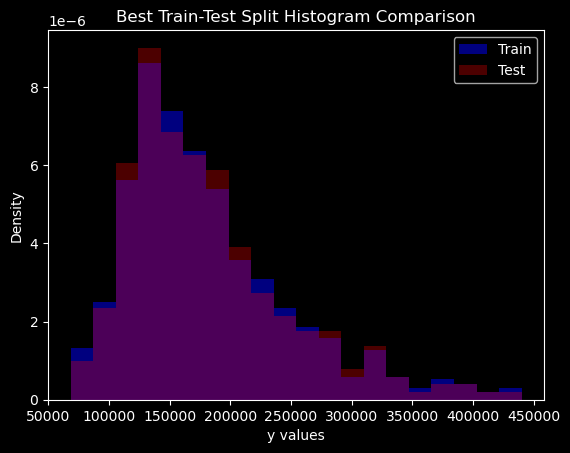

In [63]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Define the number of attempts
attempts = 10000

# Determine the global min and max of y
y_min, y_max = y.min(), y.max()
bins = np.linspace(y_min, y_max, 20 + 1)  # 25 bins means 26 edges

best_mse = float('inf')
best_split = None

for i in tqdm(range(attempts), ncols=50):
    # Perform train-test split
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_vif, y, test_size=0.2)

    # Compute histograms
    y_train_hist, _ = np.histogram(y_train_i, bins=bins, density=True)
    y_test_hist, _ = np.histogram(y_test_i, bins=bins, density=True)

    # Compute MSE between histograms
    mse = mean_squared_error(y_train_hist, y_test_hist)

    # Save the best split
    if mse < best_mse:
        best_mse = mse
        best_split = (X_train_i, X_test_i, y_train_i, y_test_i)

# Unpack the best split
X_train, X_test, y_train, y_test = best_split

# Display histograms of the best split
plt.hist(y_train, bins=bins, alpha=0.5, color='b', label='Train', density=True)
plt.hist(y_test, bins=bins, alpha=0.3, color='r', label='Test', density=True)
plt.legend()
plt.xlabel('y values')
plt.ylabel('Density')
plt.title('Best Train-Test Split Histogram Comparison')
plt.show()

## Create model

In [87]:
from keras.models import Sequential
from keras.layers import *

dropout_rate = 0.25

# Create model
model = Sequential([
    Input(shape=X_train.shape[1:]),
    
    Dense(20, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),

    Dense(20, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(10, activation='relu'),
    
    Dense(1, activation='relu'),
])

# Display model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 20)                  │           1,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 20)                  │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 20)                  │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,741 (10.71 KB)

 Trainable params: 2,661 (10.39 KB)

 Non-trainable params: 80 (320.00 B)

## Create learning rate schedule

In [88]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay, PolynomialDecay

# define training parameters
epochs          = 500
batch_size      = 256
decay_epochs    = int( epochs * 0.5 )

n_train         = X_train.shape[0]
steps_per_epoch = int( np.ceil( n_train / batch_size ) )
decay_steps     = decay_epochs * steps_per_epoch
#print(decay_steps)

# Define the learning rate schedule
initial_learning_rate = 0.05

lr_schedule_exp = ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_rate=5.0,
    decay_steps=decay_steps
)

lr_schedule_poly = PolynomialDecay(
    initial_learning_rate=initial_learning_rate,
    end_learning_rate=0.001,
    decay_steps=decay_steps,
    power=1.0
)

# Define the optimizer with a custom learning rate
optimizer = Adam(
    learning_rate=initial_learning_rate,
    #learning_rate=lr_schedule_exp,
    #learning_rate=lr_schedule_poly,
    #clipnorm=1,
    #clipvalue=1,
)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='mae'
)

## Add early stopping and learning rate reduction callbacks

In [89]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=50,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

# Callback to reduce LR when a monitored metric has stopped improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',       # metric to monitor
    factor=0.5,               # factor by which to reduce the LR
    patience=50,              # number of epochs with no improvement after which LR will be reduced
    min_lr=1e-6,              # lower bound on the learning rate
    verbose=1                 # print when LR is reduced
)

## Train model

In [90]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[
        early_stopping,
        #reduce_lr
    ]
)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 180690.5312 - val_loss: 181060.5469
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 181791.6094 - val_loss: 181019.3750
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 182569.9375 - val_loss: 180922.3281
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 181070.8125 - val_loss: 180603.8750
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 179597.6719 - val_loss: 179941.3906
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 180853.8594 - val_loss: 178949.1094
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 179423.4375 - val_loss: 177912.7344
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 180141.0000 - val_loss: 176141.1250
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 178141.9219 - val_loss: 173792.9531
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 175545.8438 - val_loss: 172290.2969
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 

## Evaluate model performance

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


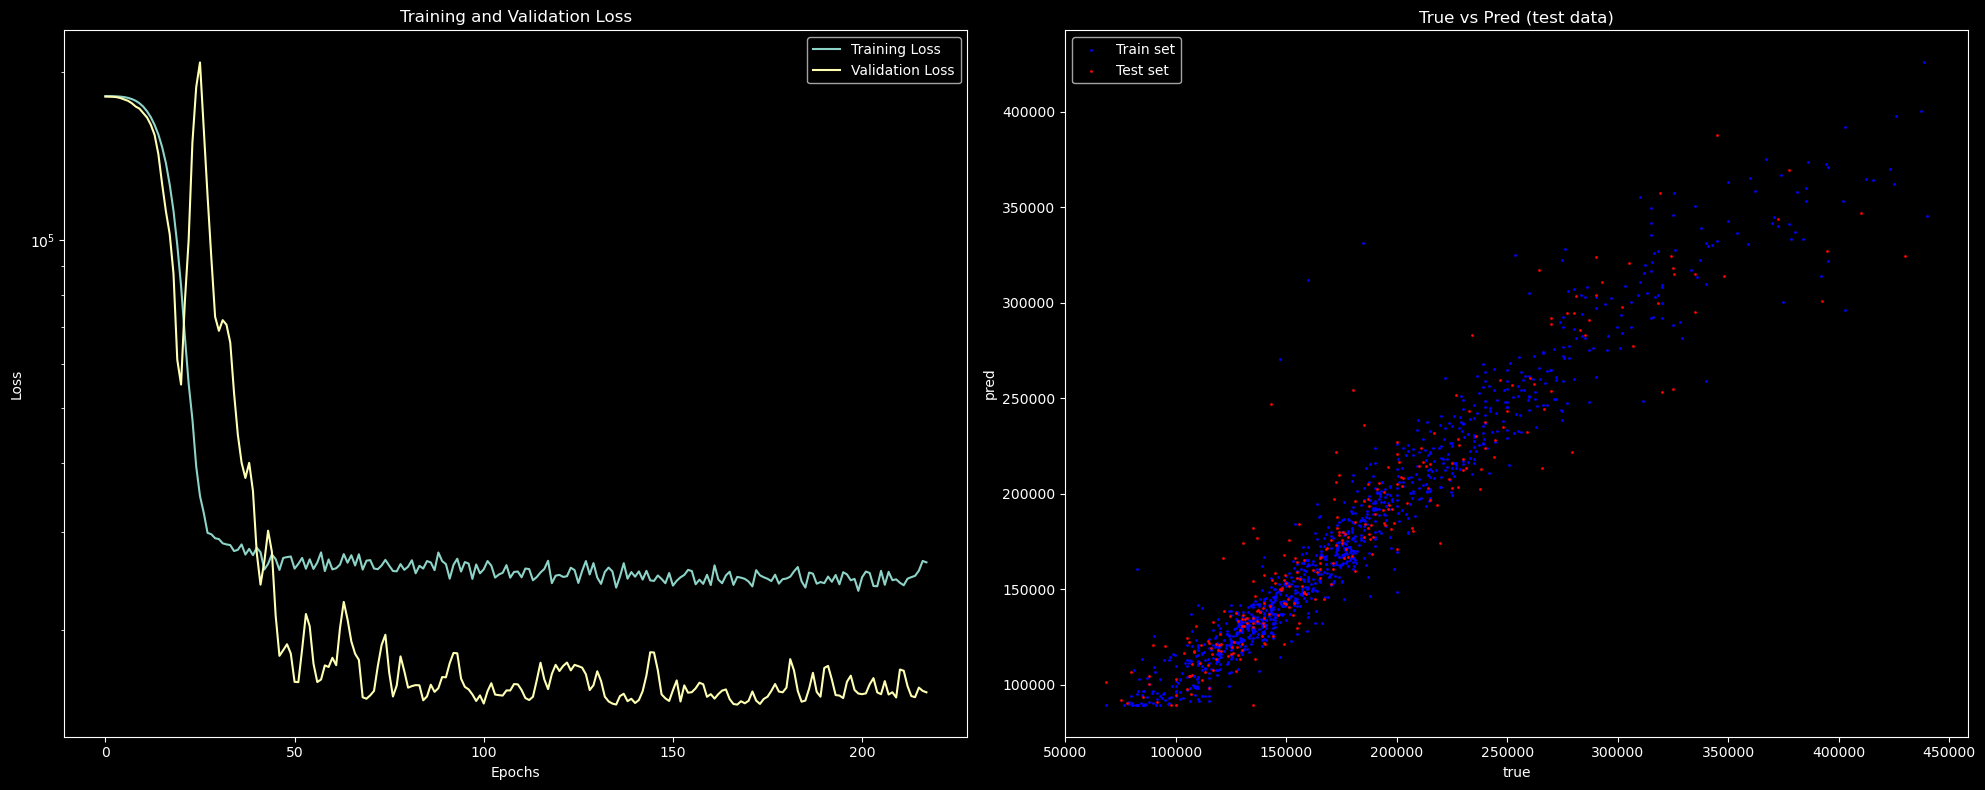

MAE:
  Train: 10997.5360
  Test:  14730.1850
R^2:
  Train: 0.9384
  Test:  0.8926


In [91]:
from sklearn.metrics import mean_absolute_error, r2_score

# Get predictions
y_train_pred = model.predict(X_train)[:,0]
y_test_pred  = model.predict(X_test)[:,0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_yscale('log')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Right subplot: True vs Predicted Data
axes[1].scatter(y_train, y_train_pred, c='b', s=1, label="Train set")
axes[1].scatter(y_test, y_test_pred, c='r', s=1, label="Test set")
axes[1].set_title('True vs Pred (test data)')
axes[1].set_xlabel('true')
axes[1].set_ylabel('pred')
axes[1].legend()

plt.tight_layout()
plt.show()

mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MAE:")
print(f"  Train: {mae_train:.4f}")
print(f"  Test:  {mae_test:.4f}")
print("R^2:")
print(f"  Train: {r2_train:.4f}")
print(f"  Test:  {r2_test:.4f}")

## Comparison w/ other models

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define regression models corresponding to the original classifiers
models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    KNeighborsRegressor(n_neighbors=10, weights='uniform'),
    KNeighborsRegressor(n_neighbors=50, weights='uniform'),
    RandomForestRegressor(n_estimators=100, max_leaf_nodes=3),
    RandomForestRegressor(n_estimators=100, max_leaf_nodes=10),
    RandomForestRegressor(n_estimators=100, max_leaf_nodes=30),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_leaf_nodes=3),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_leaf_nodes=10),
]

In [71]:
for m in models:
    m.fit(X_train, y_train)
    y_train_pred = m.predict(X_train)
    y_test_pred = m.predict(X_test)
    
    # Compute regression metrics
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Print model and its metrics
    print(m)
    print("MAE:")
    print(f"  Train: {mae_train:.4f}")
    print(f"  Test:  {mae_test:.4f}")
    print("R^2:")
    print(f"  Train: {r2_train:.4f}")
    print(f"  Test:  {r2_test:.4f}")
    print()
# end

LinearRegression()
MAE:
  Train: 16073.9959
  Test:  18568.5648
R^2:
  Train: 0.8791
  Test:  0.8606

KNeighborsRegressor()
MAE:
  Train: 15170.9219
  Test:  18725.6153
R^2:
  Train: 0.8841
  Test:  0.8300

KNeighborsRegressor(n_neighbors=10)
MAE:
  Train: 17313.4817
  Test:  19226.6444
R^2:
  Train: 0.8549
  Test:  0.8287

KNeighborsRegressor(n_neighbors=50)
MAE:
  Train: 20449.6283
  Test:  21539.6564
R^2:
  Train: 0.8068
  Test:  0.8062

RandomForestRegressor(max_leaf_nodes=3)
MAE:
  Train: 27433.4650
  Test:  27931.8935
R^2:
  Train: 0.7117
  Test:  0.7072

RandomForestRegressor(max_leaf_nodes=10)
MAE:
  Train: 19532.0345
  Test:  21421.6271
R^2:
  Train: 0.8495
  Test:  0.8142

RandomForestRegressor(max_leaf_nodes=30)
MAE:
  Train: 14275.1174
  Test:  18657.2334
R^2:
  Train: 0.9245
  Test:  0.8503

GradientBoostingRegressor(max_leaf_nodes=3)
MAE:
  Train: 13191.1908
  Test:  16128.3138
R^2:
  Train: 0.9258
  Test:  0.8784

GradientBoostingRegressor(max_leaf_nodes=10)
MAE:
  Train